In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

/srv/conda/envs/notebook/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


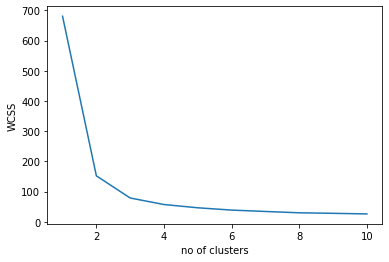

In [15]:
X=data.iloc[:,[1,2,3,4]].values
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,init='k-means++',max_iter=300)
    model.fit(X)
    wcss.append(model.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel('no of clusters')
plt.ylabel('WCSS')
plt.show()

# We can see from the above diagram (elbow) that the sharp turning, after 3 clusters the slope becomes constant, thus we conclude that the optimal no of cluster to be used is 3

In [17]:
model=KMeans(n_clusters=3,init='k-means++',max_iter=300)
model.fit(X)
y_pred=model.predict(X)


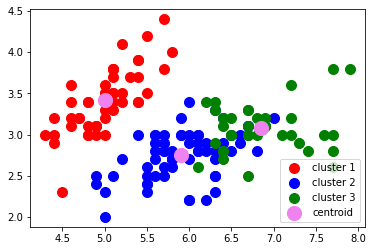

In [24]:
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],s=100, color='red',label='cluster 1')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],s=100, color='blue',label='cluster 2')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],s=100, color='green',label='cluster 3')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=200,color='violet',label='centroid')
plt.legend()
plt.show()
